In [1]:
pip install seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\map\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
import logging

In [2]:
def apply_svm(data, y, n_components=2):
    clf = OneClassSVM()
    clf.fit(data, y)
    axis = clf.dual_coef_ @ clf.support_vectors_
    axis1 = (axis / np.linalg.norm(axis))[0]
    TF1 = np.einsum("i,ji->j", axis1, data)

    data = data - np.einsum("j,ji->ji", TF1, data)
    clf = OneClassSVM()
    clf.fit(data, y)
    axis = clf.dual_coef_ @ clf.support_vectors_
    axis2 = (axis / np.linalg.norm(axis))[0]
    # print((axis2 * axis1).sum())
    axis2 = axis2 - (axis2 * axis1).sum() * axis2
    TF2 = np.einsum("i,ji->j", axis2, data)

    return np.stack([TF1, TF2], axis=1)

In [3]:
def plot_contour(data_0, data_1):
    g = sns.JointGrid()

    # Plot the density and scatter plot for the truthful data
    sns.kdeplot(x=data_0[:, 0], y=data_0[:, 1], ax=g.ax_joint, color="blue", label='safe')
    sns.kdeplot(data_0[:, 0], ax=g.ax_marg_x, color="blue")
    sns.kdeplot(y=data_0[:, 1], ax=g.ax_marg_y, color="blue")

    # Plot the density and scatter plot for the false data
    sns.kdeplot(x=data_1[:, 0], y=data_1[:, 1], ax=g.ax_joint, color="orange", label='unsafe')
    sns.kdeplot(data_1[:, 0], ax=g.ax_marg_x, color="orange")
    sns.kdeplot(y=data_1[:, 1], ax=g.ax_marg_y, color="orange")

    # Enhance the plot
    g.ax_joint.set_xlabel('Projection on the 1st Truthful Direction')
    g.ax_joint.set_ylabel('Projection on the 2nd Truthful Direction')
    g.ax_joint.legend()

    plt.show()

In [4]:
def figure_2(data_0, data_1):
    g = sns.JointGrid()
    # plt.subplot(122)
    # g = sns.JointGrid(height=4.8, ratio=5, space=0.2)

    # Plot the density and scatter plot for the truthful data
    sns.kdeplot(x=data_0[:, 0], y=data_0[:, 1], ax=g.ax_joint, color="blue", label='safe')
    sns.kdeplot(data_0[:, 0], ax=g.ax_marg_x, color="blue")
    sns.kdeplot(y=data_0[:, 1], ax=g.ax_marg_y, color="blue")

    # Plot the density and scatter plot for the false data
    sns.kdeplot(x=data_1[:, 0], y=data_1[:, 1], ax=g.ax_joint, color="orange", label='unsafe')
    sns.kdeplot(data_1[:, 0], ax=g.ax_marg_x, color="orange")
    sns.kdeplot(y=data_1[:, 1], ax=g.ax_marg_y, color="orange")

    # Enhance the plot
    g.ax_joint.set_xlabel('Projection on the 1st Truthful Direction')
    g.ax_joint.set_ylabel('Projection on the 2nd Truthful Direction')
    g.ax_joint.legend()

    plt.show()

In [5]:
L = np.load("/home/elicer/honest_llama/features/llama_7B_hateqa_mc2_labels.npy")
head_wise_activations_sep=[]
for i in range(5):
    head_wise_activations_sep.append(np.load(f"features/llama_7B_hateqa_mc2_head_wise_{i}.npy"))
    #head_wise_activations = np.load(f"../features/{args.model_name}_{args.dataset_name}_head_wise.npy")

HF = np.concatenate(head_wise_activations_sep,axis=0)
#LF = np.load("features\llama_7B_tqa_gen_end_q_layer_wise.npy")

In [6]:
from sklearn.linear_model import LogisticRegression
def apply_svm(data, y, n_components=2):
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis1 = (axis / np.linalg.norm(axis))
    TF1 = np.einsum("i,ji->j", axis1, data)

    data = data - np.einsum("j,i->ji", TF1, axis)
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis2 = (axis / np.linalg.norm(axis))
    TF2 = np.einsum("i,ji->j", axis2, data)

    print((axis1 * axis2).sum())

    return np.stack([TF1, TF2], axis=1)

In [7]:
from sklearn.linear_model import LogisticRegression
def apply_svm(data, y, n_components=2):
    axes = []
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis = (axis / np.linalg.norm(axis))
    TF1 = np.einsum("i,ji->j", axis, data)
    axes.append(axis)

    data = data - np.einsum("j,i->ji", TF1, axis)
    TF0 = np.einsum("i,ji->j", axis, data)
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis = (axis / np.linalg.norm(axis))
    TF2 = np.einsum("i,ji->j", axis, data)
    axes.append(axis)

    a1, a2 = axes
    print((a1 * a2).sum())
    return np.stack([TF1, TF2], axis=1)# 

-3.2890357104520263e-15


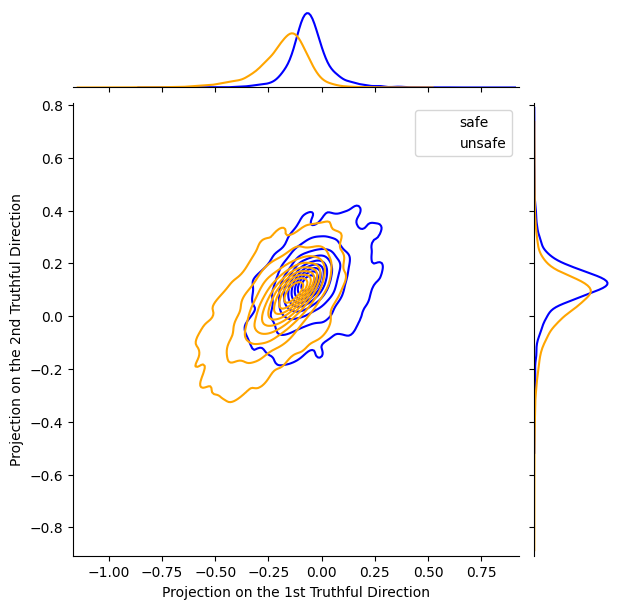

In [9]:
# X = np.concatenate([np.random.uniform(-2, 2, [100, 52]), np.random.normal(0, 1, [100, 52])], 0)
# Y = np.array([0]*100 + [1] * 100)

DATA = HF.reshape(HF.shape[0], HF.shape[1], 32, -1)[:, 16, 9, :]
# DATA = HF[:, 14, :]
Z = apply_svm(DATA, L, 2)
figure_2(Z[L == 1], Z[L == 0])